# Plotting Zoo: multiple ways to visualize the same set of data

One of the strengths and challenges of plotting data in Python with matplotlib is the sheer quantity of ways that you can plot something. Let's show that in action by plotting the same dataset in several ways. We'll start by making the most basic version of that type of plot, then explore some variations of some of those plots.

We'll use a dataset showing employment statistics of the two 5 sectors of the United States economy: health care and social assistance, state and local government, retail trade, manufacturing, and accommodation and food services for the years of 2018-2022. In 2022 these 5 sectors collectively represented just over 50% of all employment in the United States according to the data provided from the [Bureau of Economic Analysis](https://apps.bea.gov/iTable/?reqid=19&step=2&isuri=1&1921=survey&_gl=1*osw51v*_ga*Mzc1MTY0ODM4LjE3MjE1NjgyODg.*_ga_J4698JNNFT*MTcyMTU2ODI4OC4xLjAuMTcyMTU2ODI4OC42MC4wLjA.#eyJhcHBpZCI6MTksInN0ZXBzIjpbMSwyLDNdLCJkYXRhIjpbWyJDYXRlZ29yaWVzIiwiU3VydmV5Il0sWyJOSVBBX1RhYmxlX0xpc3QiLCIxOTciXV19) out of the total 143 million full-time employees. The units in the data are thousands of full-time employees.

## A table

The most basic data visualization of them all may not even be one that you would consider a visualization, but it is indeed a visual representation of the data, and that's a table. Fortunately, pandas allows us to easily make a table:

In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data/employment-by-industry.csv")
data

,Sector,2018,2019,2020,2021,2022
0,Health care and social assistance,18255,18615,18179,18522,18904
1,State and local government,16373,16553,16017,15928,16153
2,Retail trade,13809,13722,13044,13566,13704
3,Manufacturing,12387,12526,11844,12087,12523
4,Accommodation and food services,11342,11591,8986,9897,10962


Obviously, we could make the table easier to read and interpret by adding units and thousands separators, but the basic concept is there.

## Line plot

Before we start plotting our data with our line plot, let's extract the data into a numpy array where each year sector is a different row, as it's shown in the table as well. We need to exclude the sector column, though, and save it separately since those are the labels for each series. Since the pandas dataframe has both text and numerical data, we save it `astype(float)` to convert it to numerical data for later plotting. Lastly, we'll convert the data from units of thousands to millions by dividing by 1000.

In [2]:
employment = data.values[:, 1:].astype(float) / 1000
employment

array([[18.255, 18.615, 18.179, 18.522, 18.904],
       [16.373, 16.553, 16.017, 15.928, 16.153],
       [13.809, 13.722, 13.044, 13.566, 13.704],
       [12.387, 12.526, 11.844, 12.087, 12.523],
       [11.342, 11.591,  8.986,  9.897, 10.962]])

Since the names are a bit long, we're going to create some short hand for the sector names:

In [3]:
sectors = ["Healthcare", "State Gov.", "Retail", "Manufacturing", "Food & Hotel"]
sectors

['Healthcare', 'State Gov.', 'Retail', 'Manufacturing', 'Food & Hotel']

In [4]:
years = [2018, 2019, 2020, 2021, 2022]
years

[2018, 2019, 2020, 2021, 2022]

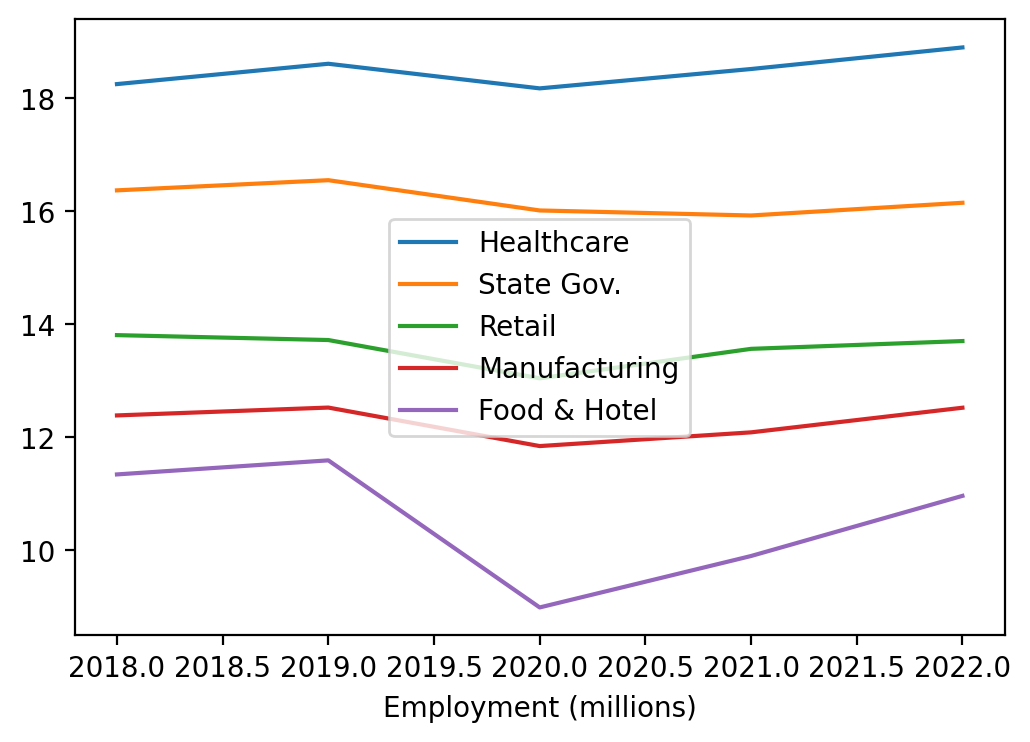

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))

for sector, employees in zip(sectors, employment):
    ax.plot(years, employees, label=sector)
ax.set_xlabel("Year")
ax.set_xlabel("Employment (millions)")
ax.legend()

### Line plot improvements

While this shows the data, the legend is covering half the data and the years are in fractional steps. Let's fix that:

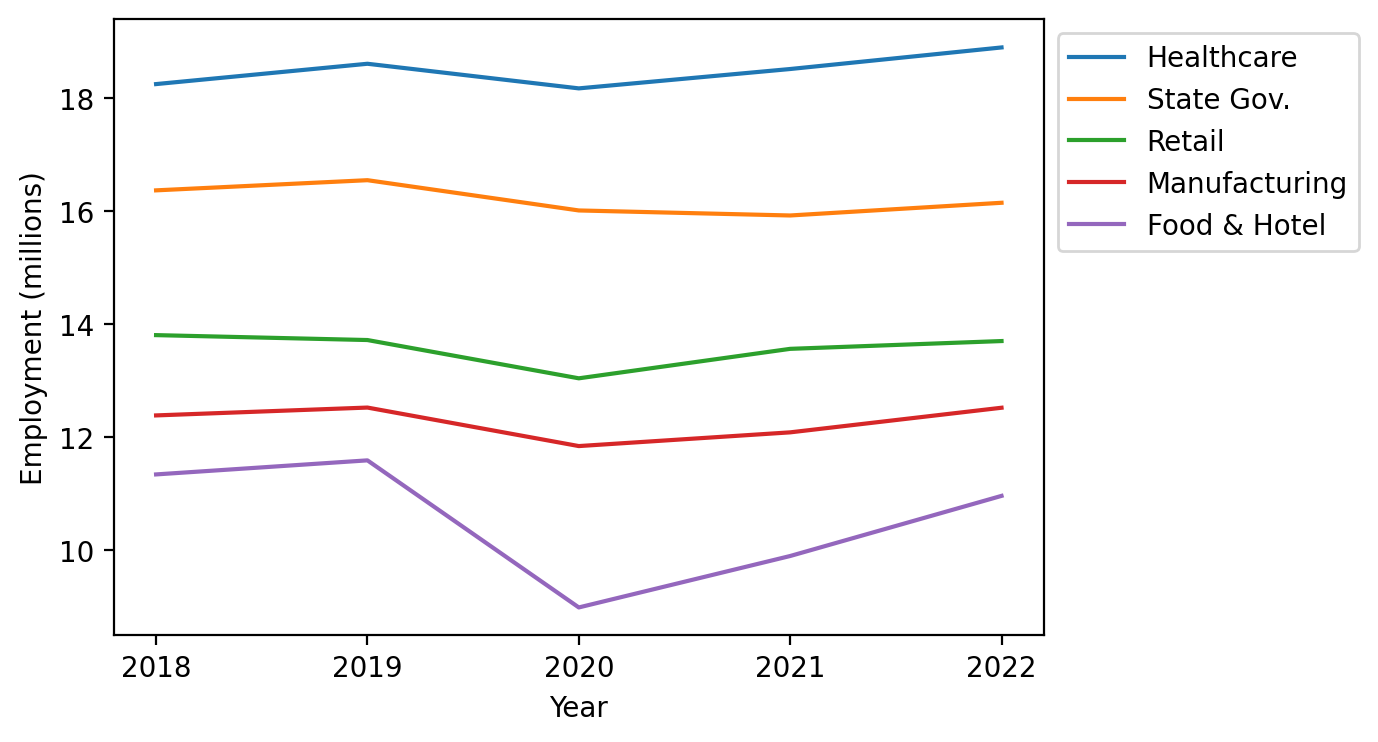

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))

for sector, employees in zip(sectors, employment):
    ax.plot(years, employees, label=sector)
ax.set_xlabel("Year")
ax.set_ylabel("Employment (millions)")
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xticks(years)

## Line plot small multiples

Another way of showing this is to highlight one line plot at a time and leave the rest grey, which is especially helpful if you have many lines to plot and want them each to tell a story in context let's take a look at how we can do this:

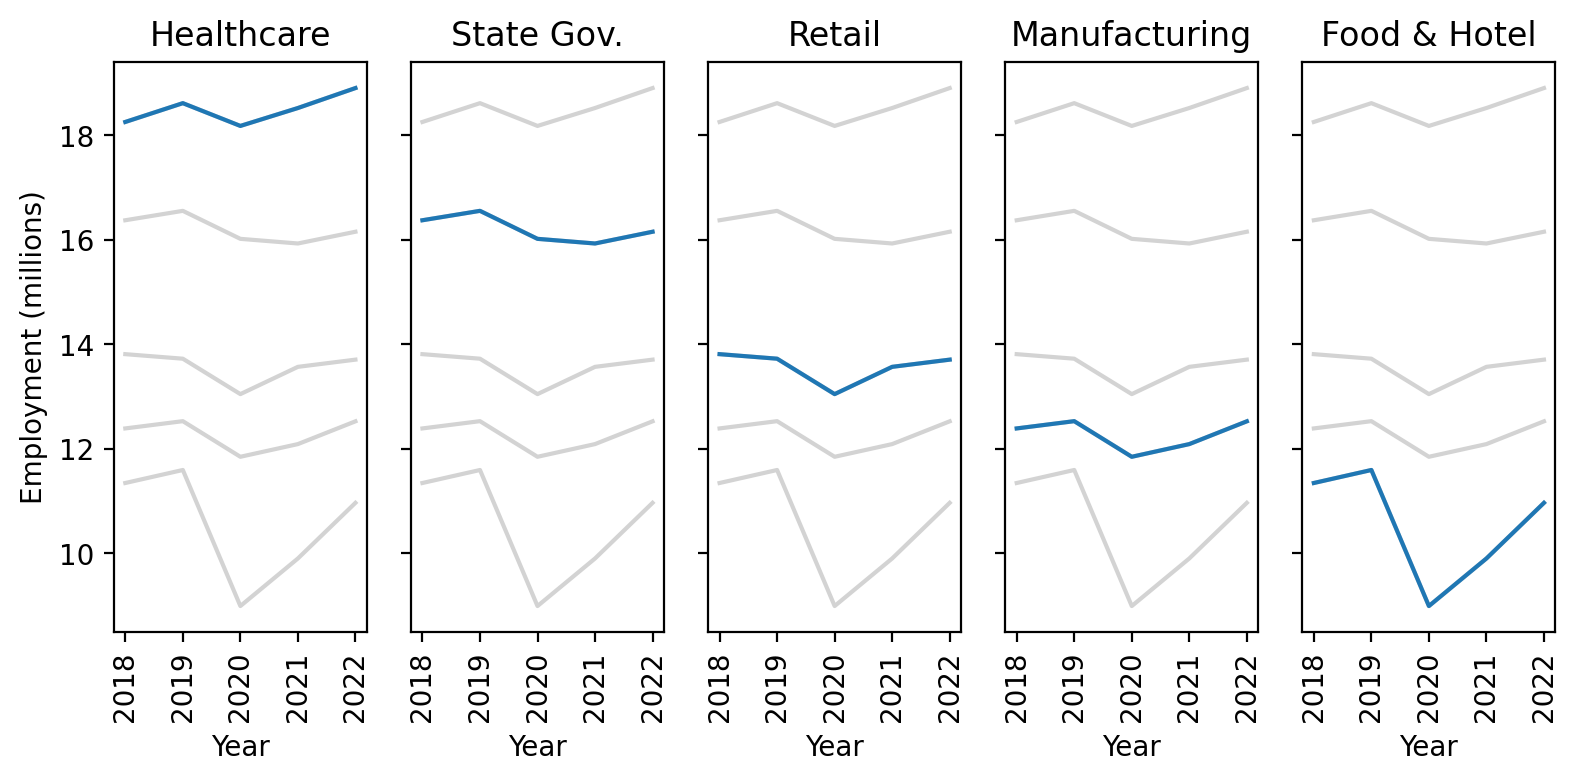

In [7]:
N_sectors = len(sectors)
fig, axs = plt.subplots(
    1, N_sectors, sharey=True, figsize=(8, 4)
)  # Sharey means only the leftmost y-tick labels are shown

# Plot all the plots in grey
for ax in axs.flatten():
    for sector, employees in zip(sectors, employment):
        ax.plot(years, employees, color="lightgrey")
    ax.set_xlabel("Year")
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=90)

# Plot one plot each in color and title the plot with that sector
for sector, employees, ax in zip(sectors, employment, axs.flatten()):
    ax.plot(years, employees)
    ax.set_title(sector)

# Only place one ylabel on the first set of Axes:
axs[0].set_ylabel("Employment (millions)")

plt.tight_layout()

## Stacked bar plot

Let's try this out as a bar plot with years on the x-axis and the stacked elements representing each sector:

Text(0, 0.5, 'Employment (millions)')

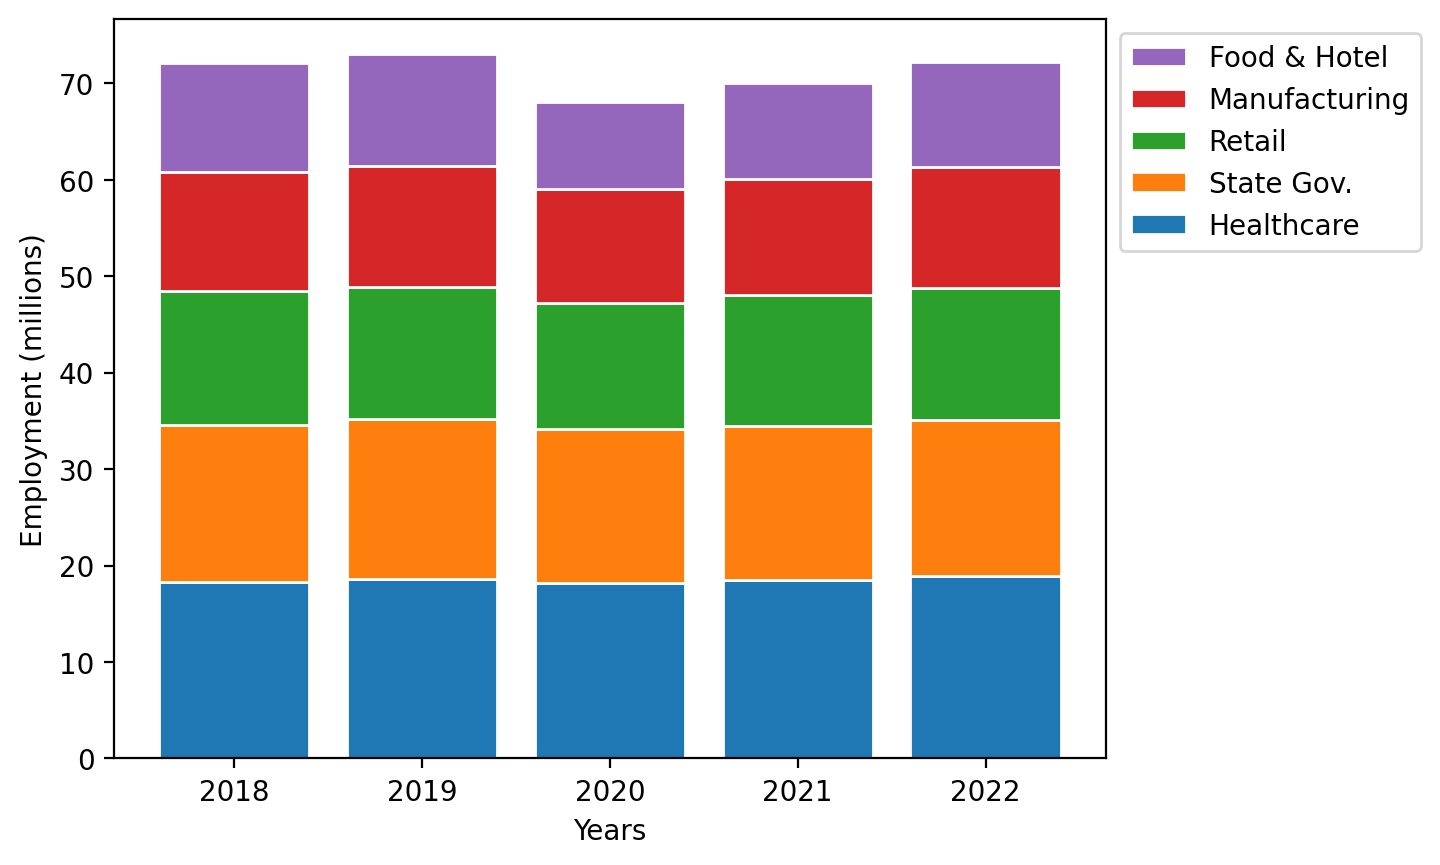

In [8]:
fig, ax = plt.subplots()

N_years = len(years)
bottom = np.zeros(
    N_years
)  # Stores the current baseline of the bars to set as the baseline for the next set of bars

for sector, employees in zip(sectors, employment):
    ax.bar(
        years, employees, label=sector, bottom=bottom, edgecolor="white"
    )  # edgecolor = 'white' places a bit of white between the bars for clarity (a personal preference)
    bottom += employees

ax.legend(
    bbox_to_anchor=(1, 1), loc="upper left", reverse=True
)  # This ensures the order matches the order in the plot from top to bottom
ax.set_xlabel("Years")
ax.set_ylabel("Employment (millions)")

We could alternatively create a grouped bar plot with the years being the group on the x-axis and the sectors as different bars in each group:

Text(0, 0.5, 'Employment (millions)')

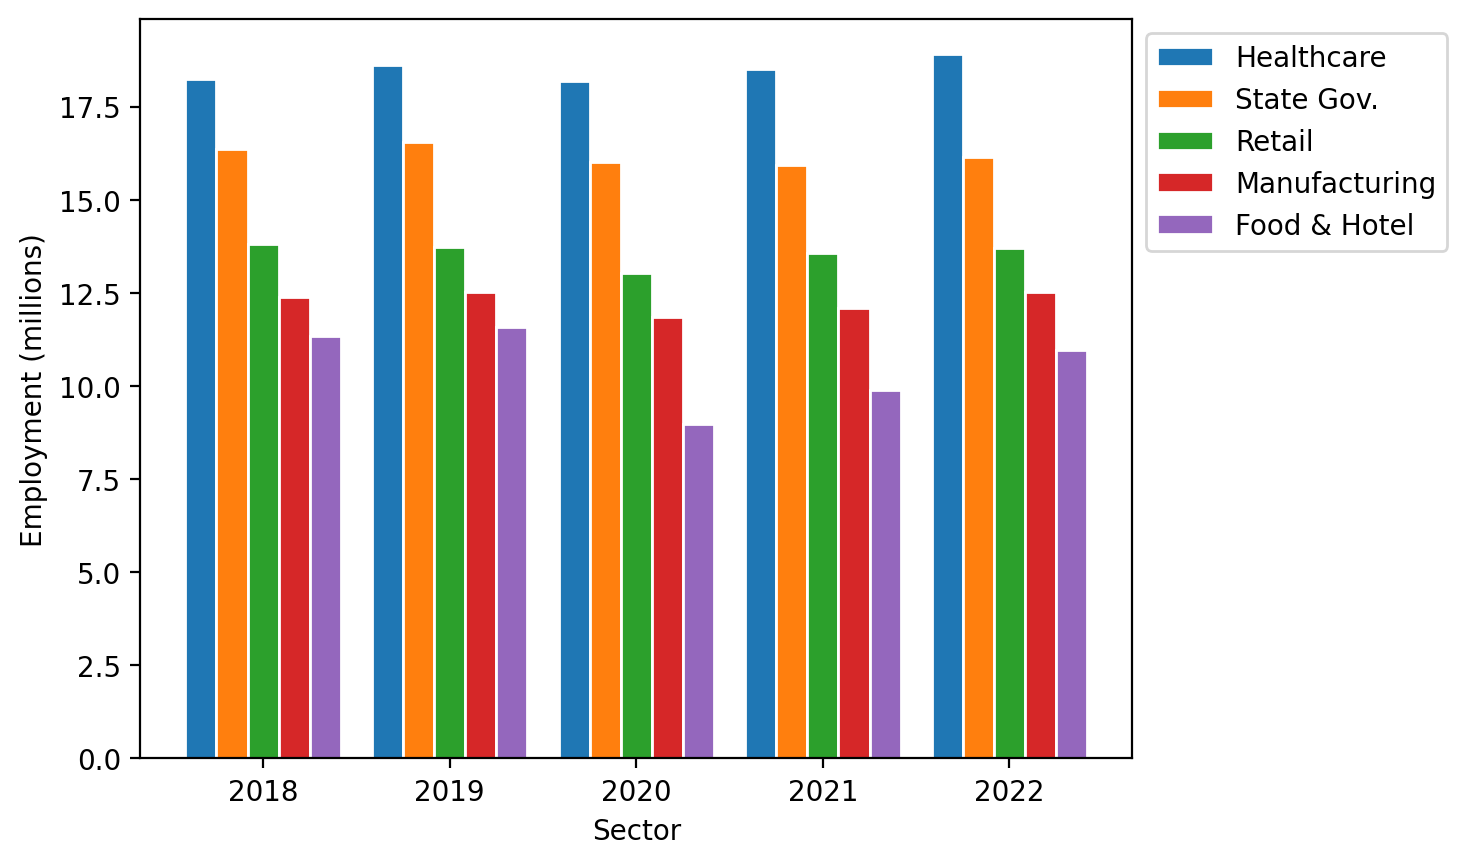

In [9]:
fig, ax = plt.subplots()

num_columns = len(sectors)  # Number of bars per group
num_rows = len(years)  # Number of groups

x_values = np.arange(num_rows)

bar_width = 1 / (
    num_columns + 1
)  # width of the bars. To ensure a gap between groups, this could be 1 / (N+1) where N is the number of bars per group
column_count = 0  # Count of how many sets of bars have been plotted so far

for sector, employees in zip(sectors, employment):
    offset = (
        bar_width * column_count
    )  # Offset from the x axis value for the group to the place where the bar will be centered
    ax.bar(
        x_values + offset, employees, width=bar_width, label=sector, edgecolor="white"
    )  # edgecolor = 'white' places a bit of white between the bars for clarity (a personal preference)
    column_count += 1

tick_locations = (
    x_values + (1 - offset) / 2 + bar_width
)  # Place the ticks at the center of the groups of bars
ax.set_xticks(tick_locations)
ax.set_xticklabels(years)

ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel("Sector")
ax.set_ylabel("Employment (millions)")

## Stackplots
 
 Stackplots here are a viable alternative since we have timeseries data in the same units across the sectors. Let's see how we can make one of those:

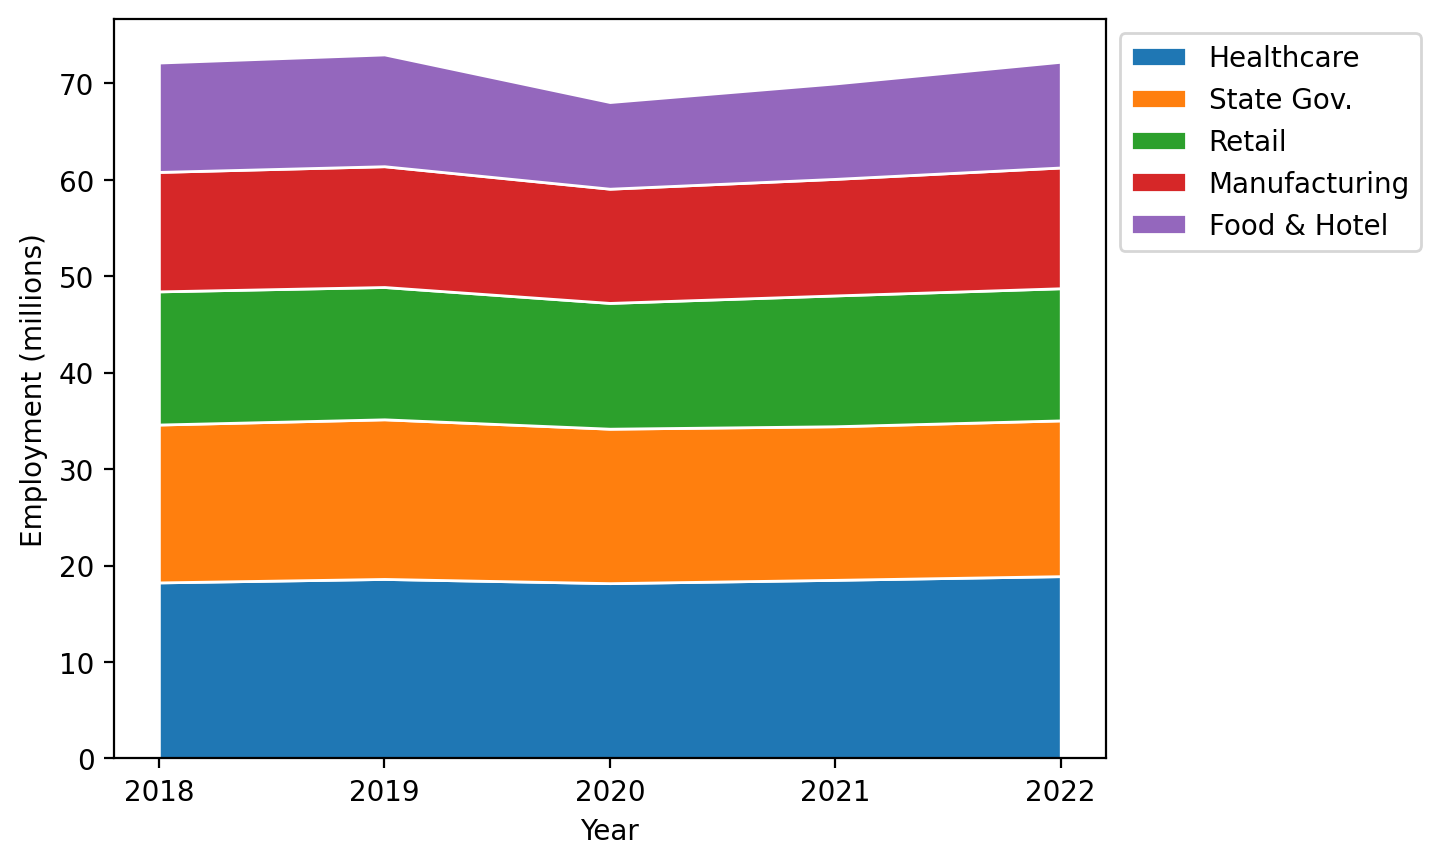

In [10]:
fig, ax = plt.subplots()

ax.stackplot(
    years, employment, labels=sectors, edgecolor="white"
)  # edgecolor = 'white' places a bit of white between the colors for clarity (a personal preference)
ax.set_xlabel("Year")
ax.set_ylabel("Employment (millions)")
ax.set_xticks(years)

ax.legend(bbox_to_anchor=(1, 1), loc="upper left")

### Scaled stack plots

Now, let's make it so the stackplot shows the total share of the data. Recall that these data represent approximately 50% of employment, so we would need to include the other sectors in the plot if we using this in practice, but this gives us a sense of *how* to do it given the data at hand:

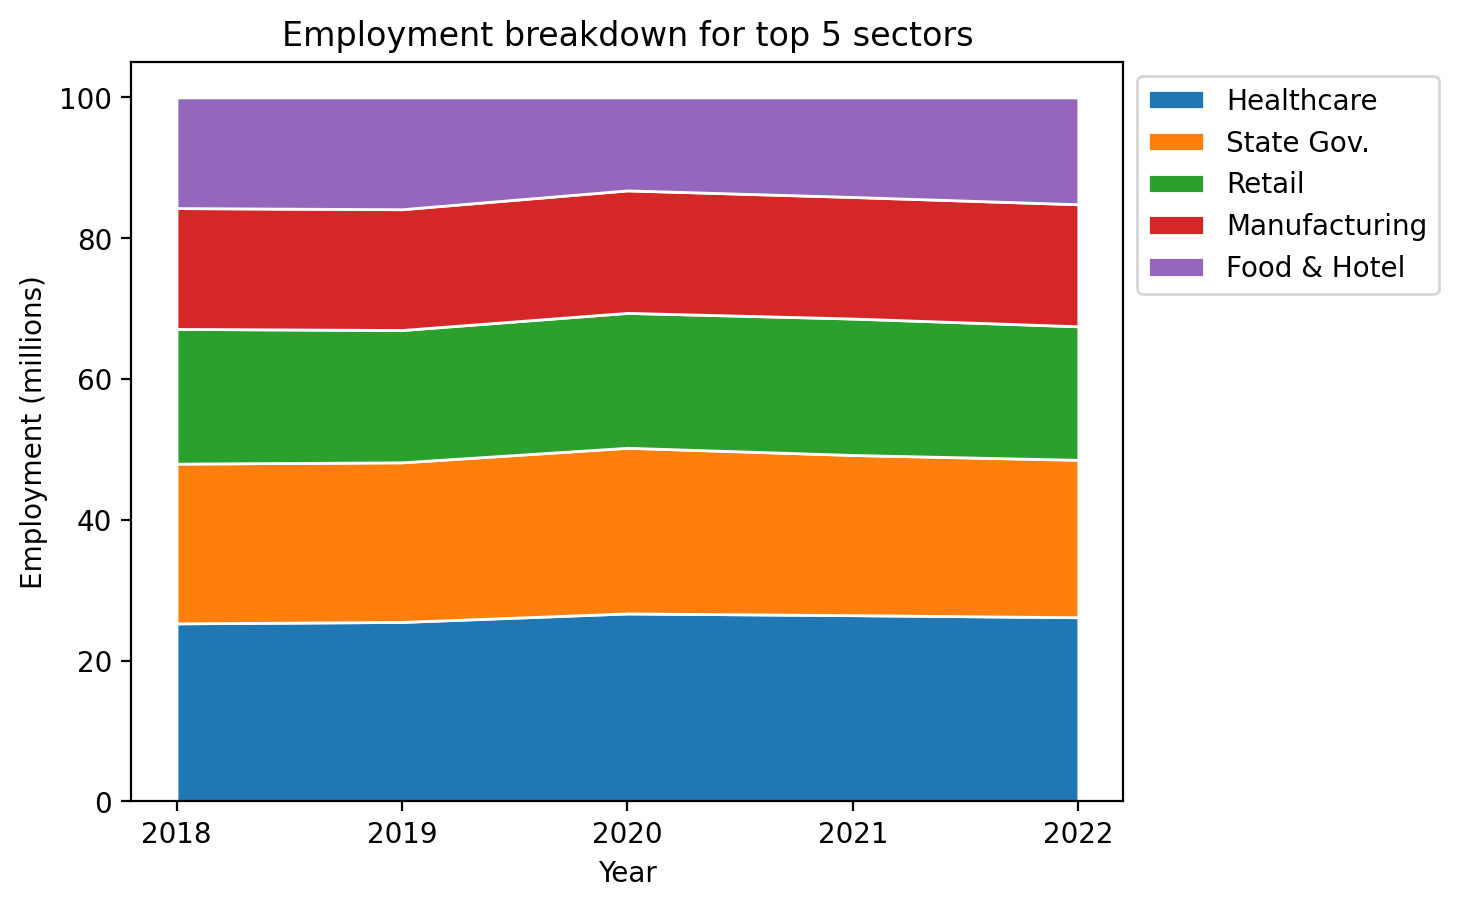

In [11]:
# Convert our data to a percentage
employment_percent = employment / employment.sum(axis=0) * 100

fig, ax = plt.subplots()

ax.stackplot(years, employment_percent, labels=sectors, edgecolor="white")
ax.set_xlabel("Year")
ax.set_ylabel("Employment (millions)")
ax.set_xticks(years)
ax.set_title("Employment breakdown for top 5 sectors")

ax.legend(bbox_to_anchor=(1, 1), loc="upper left")

## Pie charts

Let's create 5 small multiple pie charts that show the breakdown by year. We introduce one additional property of `pie` here which is the `textprops` property. This sets style properties related to the text autogenerated by `pie` to form the labels of the pie chart. Here, we'll center-align the text and set the color of that text to white.

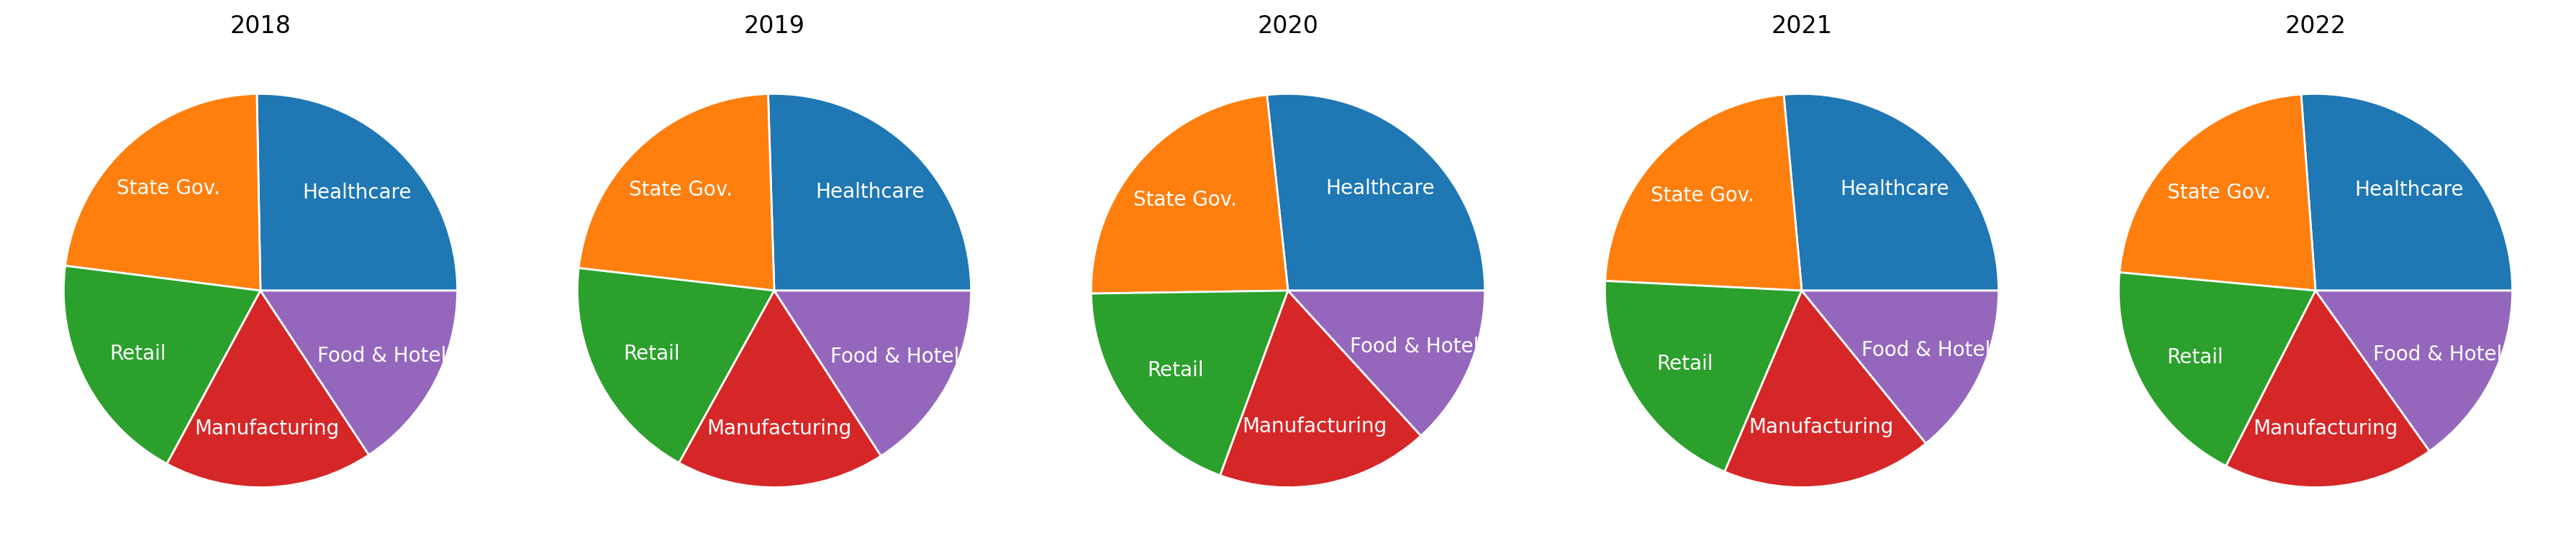

In [12]:
N_sectors = len(sectors)
fig, axs = plt.subplots(
    1, N_sectors, figsize=(18, 5)
)  # The figsize here is set sufficiently

# Plot all the plots in grey
employment_by_sector = employment.T
for year, employees, ax in zip(years, employment_by_sector, axs.flatten()):
    ax.pie(
        employees,
        labels=sectors,
        labeldistance=0.7,
        wedgeprops={"edgecolor": "white"},
        textprops={"horizontalalignment": "center", "color": "white"},
    )
    ax.set_title(year)

plt.tight_layout()

## Summary

Every one of the plots in this section explored the same dataset and each plot provides a slightly different impression. If our goal was to show the impact on jobs of the Covid-19 pandemic in 2020, the line plots did that best. If our goal was to show the changes in the distribution of employment between these 5 top sectors, the stack plot arguably did that best. We have to choose the right plot for the right job, but we now have many tools at our disposal to choose from.